<a href="https://colab.research.google.com/github/Yashrjadhav/DL/blob/main/dl2(1)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2993 - loss: 2.6055 - val_accuracy: 0.7156 - val_loss: 1.0756
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7140 - loss: 1.0319 - val_accuracy: 0.7825 - val_loss: 0.7826
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7792 - loss: 0.7780 - val_accuracy: 0.8144 - val_loss: 0.6467
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8149 - loss: 0.6474 - val_accuracy: 0.8328 - val_loss: 0.5733
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8373 - loss: 0.5610 - val_accuracy: 0.8466 - val_loss: 0.5186
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8532 - loss: 0.5076 - val_accuracy: 0.8641 - val_loss: 0.4754
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8646 - loss: 0.4566 - val_accuracy: 0.8756 - val_loss: 0.4497
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8766 - loss: 0.4247 - val_accuracy: 0.

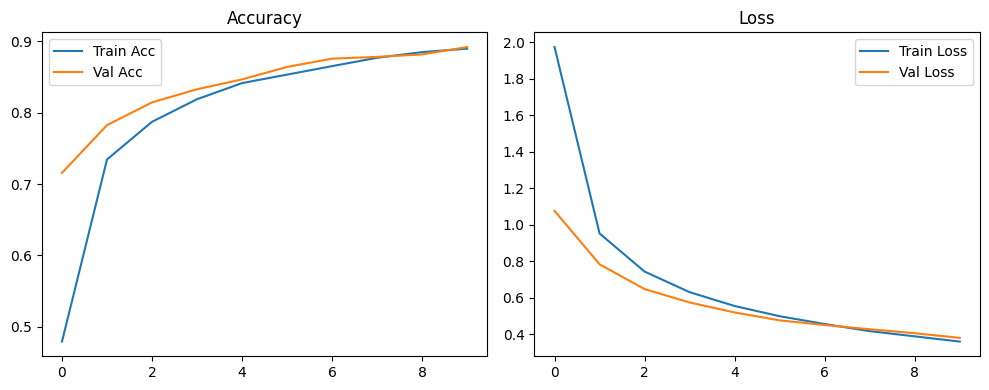

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1) Load & preprocess data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data",
                 header=None)
df.columns = ['letter'] + [f'feat{i}' for i in range(1,17)]
le = LabelEncoder()
y_int = le.fit_transform(df['letter'])
y = to_categorical(y_int)
X = StandardScaler().fit_transform(df.drop('letter', axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 2) Build & train model
model = Sequential([
    Input(shape=(16,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(26, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# 3) Predict & evaluate
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=le.inverse_transform(range(26))))

# 4) Plot accuracy & loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()
